In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [4]:
# Import ufo dataframe with weather info
ufo_graph = pd.read_csv("Resources/ufo_sample_weather.csv")
# Rename columns for graphing
ufo_graph = ufo_graph.rename(columns={"temp": "Temperature (F)", "humidity": "Humidity", 
                                        "cloudcover": "Cloud Cover", "visibility": "Visibility", 
                                        "heatindex": "Heat Index", "moon_illumination": "Moon Illumination", 
                                        "sightings": "UFO Sightings"})
ufo_graph.head()

,Unnamed: 0,city,year,UFO Sightings,date_time,date,time,Temperature (F),Humidity,Cloud Cover,Visibility,Heat Index,Moon Illumination
0,27520,Charlottesville,2013,1,03-30 20:20:00,2013-03-30,20,41,72,26,6,41,72
1,23379,Reading,2012,1,02-28 23:57:00,2012-02-28,23,46,96,56,3,46,42
2,33411,Huntsville,2014,1,05-01 20:30:00,2014-05-01,20,52,76,10,6,52,9
3,33528,Amherst,2010,1,05-12 23:30:00,2010-05-12,23,37,90,7,6,37,0
4,5380,Phoenix,2008,1,10-05 10:20:00,2008-10-05,10,73,43,7,6,75,35


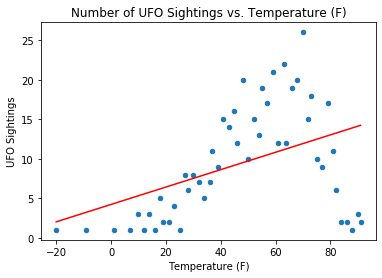

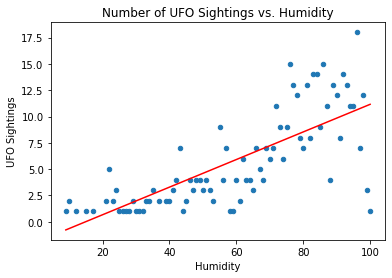

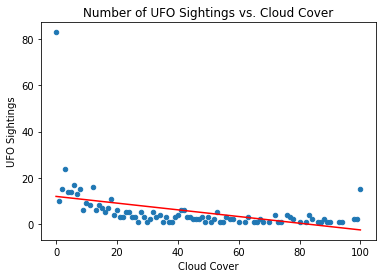

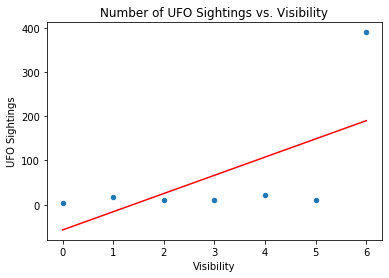

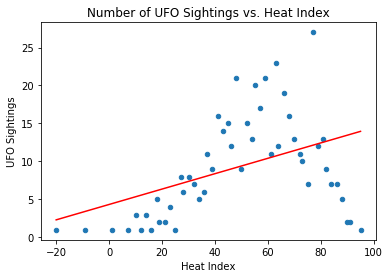

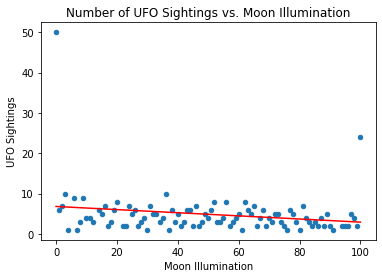

In [9]:
# Plot comparisons for sightings vs. weather varaibles
variables = ["Temperature (F)", "Humidity", "Cloud Cover", "Visibility", 
             "Heat Index", "Moon Illumination"]

for x in variables:
    ufo_x = ufo_graph.groupby(x).count()
    ufo_x = ufo_x.reset_index()
    ufo_x.plot(kind="scatter", y="UFO Sightings", x=x, 
                  title=f"Number of UFO Sightings vs. {x}")
    (slope, intercept, rvalue, pvalue, sterr) = linregress(ufo_x[x], ufo_x["UFO Sightings"])
    regressValues = (slope*ufo_x[x]) + intercept
    plt.plot(ufo_x[x], regressValues, "red")
    
    
    save = x.replace(" ", "_").lower()
    plt.savefig(f"Weather_Graphs/{save}_ufo.png")